#1. Problem Statement

Aerofit, a fitness equipment company, seeks to optimize its marketing strategy by understanding the characteristics of its customer base for each type of treadmill offered. They aim to create customer profiles for their treadmill products (KP281, KP481, and KP781) and analyze whether differences exist across products with respect to customer demographics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
customers = pd.read_csv("/content/aerofit_treadmill.csv")
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [5]:
print("Data Types of Each Column:")
print(customers.dtypes)

Data Types of Each Column:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [6]:
num_rows, num_cols = customers.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)


Number of Rows: 180
Number of Columns: 9


In [7]:
missing_values = customers.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [8]:
customers.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
# Convert categorical attributes to 'category'
# customers['Product Purchased'] = customers['Product'].astype('category')
# customers['Gender'] = customers['Gender'].astype('category')
# customers['MaritalStatus'] = customers['MaritalStatus'].astype('category')

2. Non-Graphical Analysis: Value counts and unique attributes

In [10]:
# Value counts and unique attributes for each categorical column
print("Value Counts and Unique Attributes:")

# Product Purchased
print("\nProduct:")
print(customers['Product'].value_counts())
print("Unique Attributes:", customers['Product'].unique())

# Gender
print("\nGender:")
print(customers['Gender'].value_counts())
print("Unique Attributes:", customers['Gender'].unique())

# MaritalStatus
print("\nMaritalStatus:")
print(customers['MaritalStatus'].value_counts())
print("Unique Attributes:", customers['MaritalStatus'].unique())

Value Counts and Unique Attributes:

Product:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
Unique Attributes: ['KP281' 'KP481' 'KP781']

Gender:
Male      104
Female     76
Name: Gender, dtype: int64
Unique Attributes: ['Male' 'Female']

MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
Unique Attributes: ['Single' 'Partnered']


In [11]:
# Unique attributes for non-categorical columns
print("Unique Attributes for Non-Categorical Columns:")

# Age
print("\nAge:")
print("Unique Attributes:", customers['Age'].unique())

# Education
print("\nEducation:")
print("Unique Attributes:", customers['Education'].unique())

# Usage
print("\nUsage:")
print("Unique Attributes:", customers['Usage'].unique())

# Income
print("\nIncome:")
print("Unique Attributes:", customers['Income'].unique())

# Fitness
print("\nFitness:")
print("Unique Attributes:", customers['Fitness'].unique())

# Miles
print("\nMiles:")
print("Unique Attributes:", customers['Miles'].unique())

Unique Attributes for Non-Categorical Columns:

Age:
Unique Attributes: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Education:
Unique Attributes: [14 15 12 13 16 18 20 21]

Usage:
Unique Attributes: [3 2 4 5 6 7]

Income:
Unique Attributes: [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Fitness:
Unique Attributes: [4 3 2 1 5]

Miles:
Unique Attributes: [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [13]:
# Value counts for non-categorical columns (grouped into bins)
print("Value Counts for Non-Categorical Columns:")

# Age bins
age_bins = pd.cut(customers['Age'], bins=5)
print("\nAge Bins:")
print(age_bins.value_counts())

# Education bins
education_bins = pd.cut(customers['Education'], bins=5)
print("\nEducation Bins:")
print(education_bins.value_counts())

# Usage bins
usage_bins = pd.cut(customers['Usage'], bins=5)
print("\nUsage Bins:")
print(usage_bins.value_counts())

# Income bins
income_bins = pd.cut(customers['Income'], bins=5)
print("\nIncome Bins:")
print(income_bins.value_counts())

# Fitness bins
fitness_bins = pd.cut(customers['Fitness'], bins=5)
print("\nFitness Bins:")
print(fitness_bins.value_counts())

# Miles bins
miles_bins = pd.cut(customers['Miles'], bins=5)
print("\nMiles Bins:")
print(miles_bins.value_counts())

Value Counts for Non-Categorical Columns:

Age Bins:
(24.4, 30.8]      66
(17.968, 24.4]    54
(30.8, 37.2]      35
(37.2, 43.6]      16
(43.6, 50.0]       9
Name: Age, dtype: int64

Education Bins:
(15.6, 17.4]      85
(13.8, 15.6]      60
(17.4, 19.2]      23
(11.991, 13.8]     8
(19.2, 21.0]       4
Name: Education, dtype: int64

Usage Bins:
(1.995, 3.0]    102
(3.0, 4.0]       52
(4.0, 5.0]       17
(5.0, 6.0]        7
(6.0, 7.0]        2
Name: Usage, dtype: int64

Income Bins:
(44565.8, 59569.6]      89
(29486.981, 44565.8]    49
(59569.6, 74573.4]      20
(89577.2, 104581.0]     14
(74573.4, 89577.2]       8
Name: Income, dtype: int64

Fitness Bins:
(2.6, 3.4]      97
(4.2, 5.0]      31
(1.8, 2.6]      26
(3.4, 4.2]      24
(0.996, 1.8]     2
Name: Fitness, dtype: int64

Miles Bins:
(20.661, 88.8]    87
(88.8, 156.6]     65
(156.6, 224.4]    23
(224.4, 292.2]     3
(292.2, 360.0]     2
Name: Miles, dtype: int64


2. Visual Analysis - Univariate & Bivariate

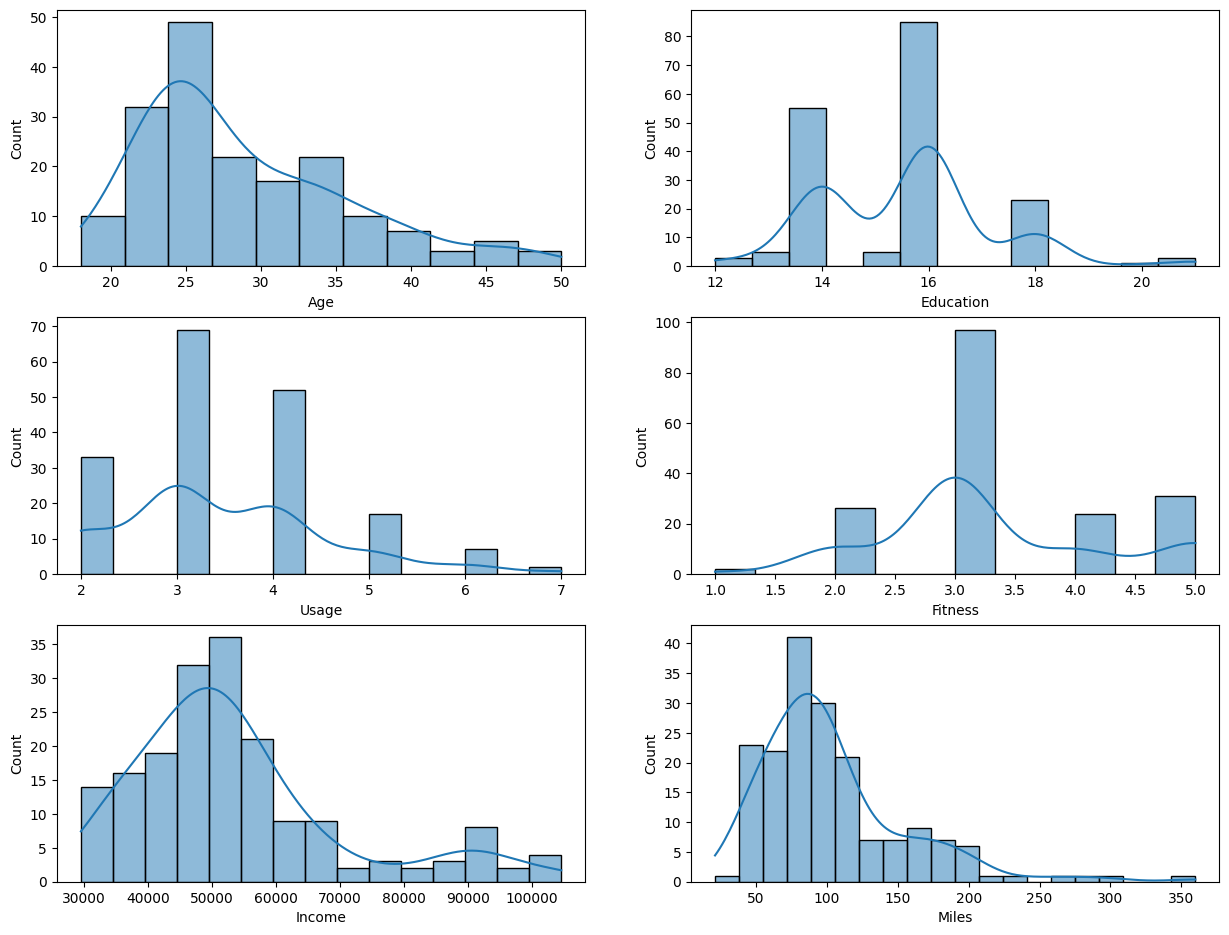

In [45]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=customers, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=customers, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=customers, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=customers, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=customers, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=customers, x="Miles", kde=True, ax=axis[2,1])
plt.show()

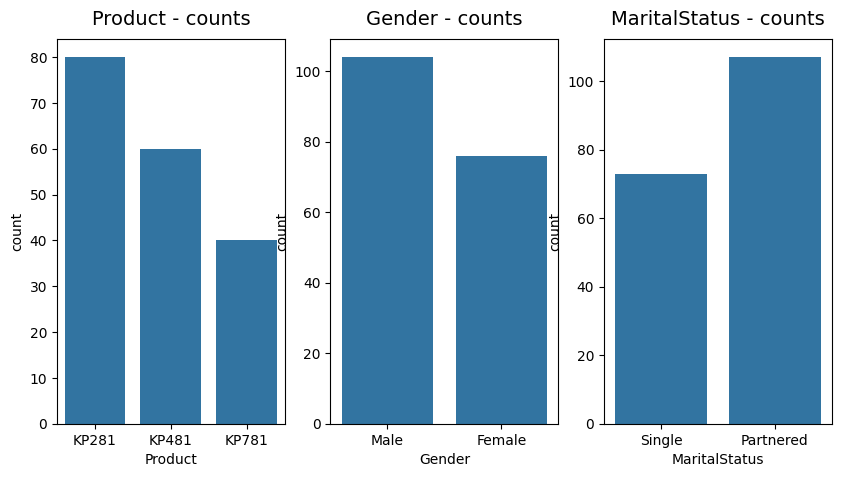

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
sns.countplot(data=customers, x='Product', ax=axs[0])
sns.countplot(data=customers, x='Gender', ax=axs[1])
sns.countplot(data=customers, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

In [48]:
df1 = customers[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(customers)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

In [ ]:
# Observations
# Product
# 44.44% of the customers have purchased KP2821 product.
# 33.33% of the customers have purchased KP481 product.
# 22.22% of the customers have purchased KP781 product.
# Gender
# 57.78% of the customers are Male.
# MaritalStatus
# 59.44% of the customers are Partnered.

_____________________________________________________________________________________
#2. Detect Outliers

In [ ]:
# Find the outliers for every continuous variable in the dataset
# Hint: We want you to use boxplots to find the outliers in the given dataset

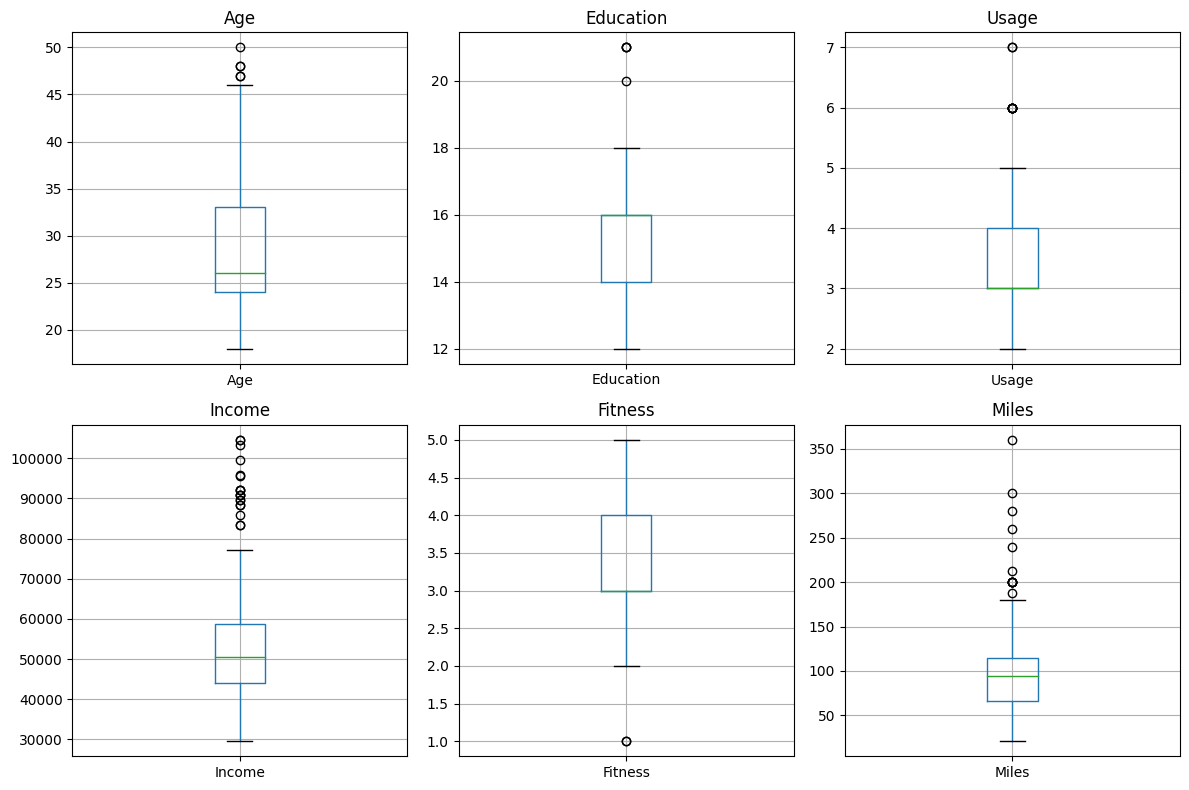

In [14]:
# Select continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    customers.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
summary_stats = customers[continuous_vars].describe()

# Extract mean and median
mean_values = summary_stats.loc['mean']
median_values = summary_stats.loc['50%']

# Concatenate mean and median horizontally
mean_median_df = pd.concat([mean_values, median_values], axis=1)
mean_median_df.columns = ['Mean', 'Median']

# Display mean and median side by side
print("Mean and Median for Continuous Variables:")
print(mean_median_df)

Mean and Median for Continuous Variables:
                   Mean   Median
Age           28.788889     26.0
Education     15.572222     16.0
Usage          3.455556      3.0
Income     53719.577778  50596.5
Fitness        3.311111      3.0
Miles        103.194444     94.0


In [16]:
# Remove/clip the data between the 5 percentile and 95 percentile
# Hint: We want You to use np.clip() for clipping the data

In [17]:
for col in continuous_vars:
    lower_bound = customers[col].quantile(0.05)
    upper_bound = customers[col].quantile(0.95)
    customers[col] = np.clip(customers[col], lower_bound, upper_bound)

# Display the modified dataset
print("Modified Dataset after clipping outliers:")
print(customers)

Modified Dataset after clipping outliers:
    Product    Age  Gender  Education MaritalStatus  Usage  Fitness    Income  \
0     KP281  20.00    Male         14        Single   3.00        4  34053.15   
1     KP281  20.00    Male         15        Single   2.00        3  34053.15   
2     KP281  20.00  Female         14     Partnered   4.00        3  34053.15   
3     KP281  20.00    Male         14        Single   3.00        3  34053.15   
4     KP281  20.00    Male         14     Partnered   4.00        2  35247.00   
..      ...    ...     ...        ...           ...    ...      ...       ...   
175   KP781  40.00    Male         18        Single   5.05        5  83416.00   
176   KP781  42.00    Male         18        Single   5.00        4  89641.00   
177   KP781  43.05    Male         16        Single   5.00        5  90886.00   
178   KP781  43.05    Male         18     Partnered   4.00        5  90948.25   
179   KP781  43.05    Male         18     Partnered   4.00        5

#3. Check if features like marital status, Gender, and age have any effect on the product purchased

In [18]:
customers = pd.read_csv("/content/aerofit_treadmill.csv")
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [19]:
# Find if there is any relationship between the categorical variables and the output variable in the data.
# Hint: We want you to use the count plot to find the relationship between categorical variables and output variables.

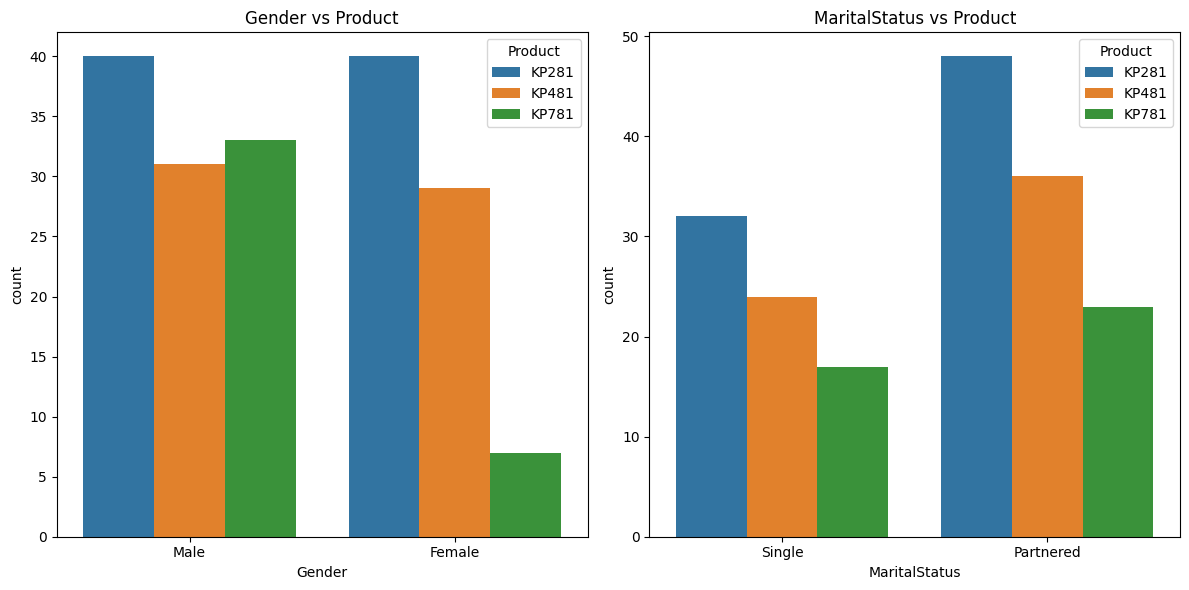

In [20]:
# Define the list of categorical variables
categorical_vars = ['Gender', 'MaritalStatus']

output_variable = "Product"

# Create count plots for each categorical variable with respect to the output variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.countplot(x=col, hue=output_variable, data=customers)
    plt.title(f"{col} vs {output_variable}")
plt.tight_layout()
plt.show()

In [ ]:
# Observations
# Product vs Gender
# Equal number of males and females have purchased KP281 product and Almost same for the product KP481
# Most of the Male customers have purchased the KP781 product.
# Product vs MaritalStatus
# Customer who is Partnered, is more likely to purchase the product.

In [22]:
# Find if there is any relationship between the continuous variables and the output variable in the data.
# Hint: We want you to use a scatter plot to find the relationship between continuous variables and output variables.

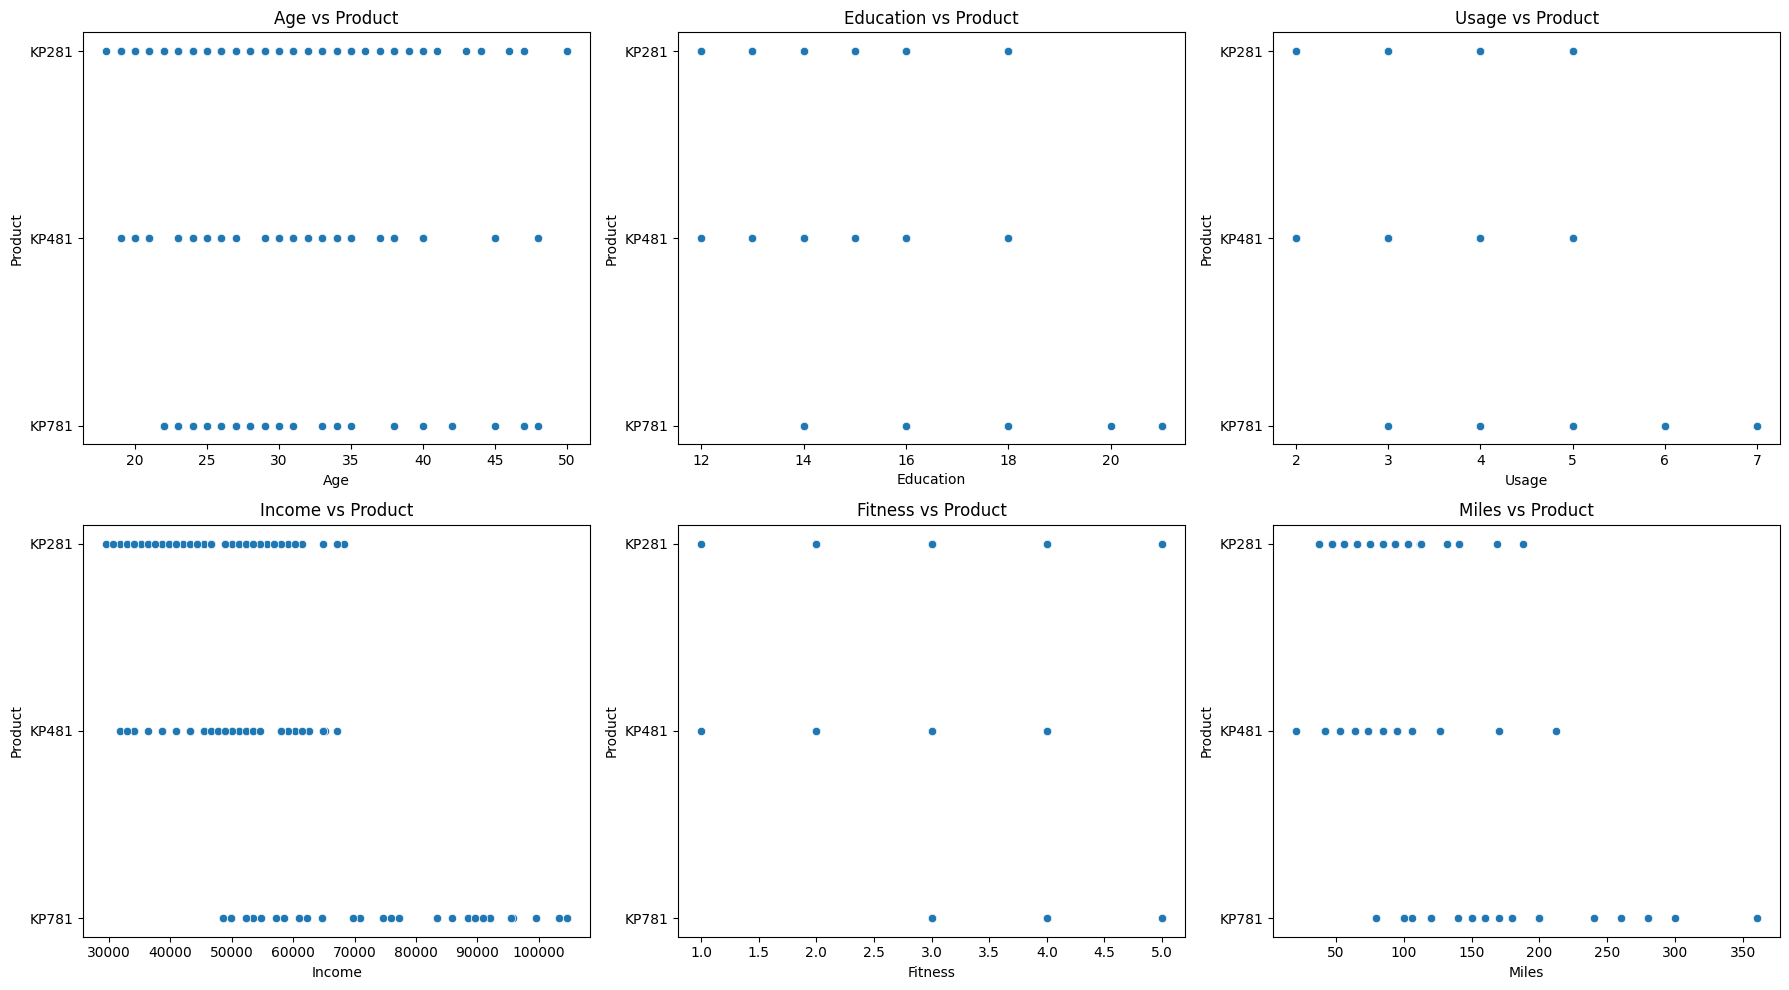

In [21]:
output_variable = "Product"

# Define the list of continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Create scatter plots for each continuous variable with respect to the output variable
plt.figure(figsize=(18, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y=output_variable, data=customers)
    plt.title(f"{col} vs {output_variable}")
plt.tight_layout()
plt.show()

<ipython-input-56-1a961c9f9aa7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
<ipython-input-56-1a961c9f9aa7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
<ipython-input-56-1a961c9f9aa7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
<ipython-input-56-1a961c9f9aa7>:9: FutureWarning: 

Passing `palette` without assi

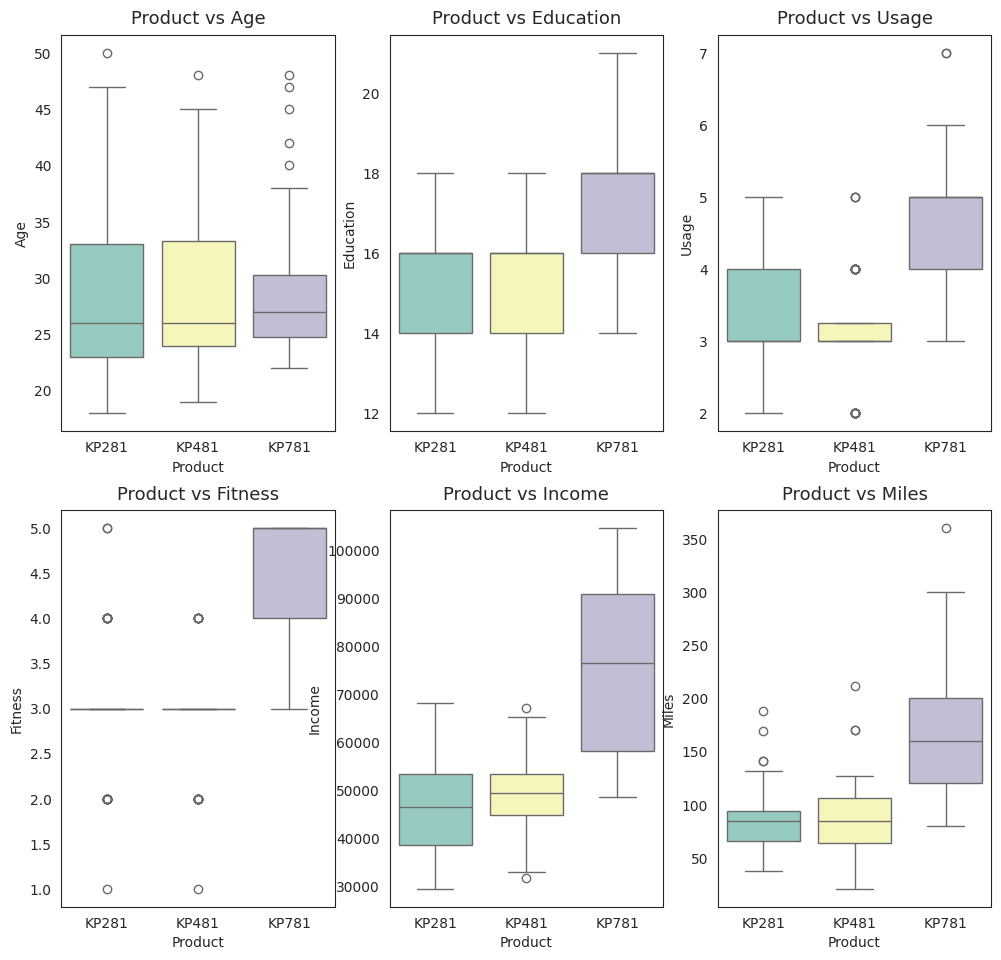

In [56]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.subplots_adjust(top=1.2)
count = 0

for i in range(2):
  for j in range(3):
    sns.boxplot(data=customers, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
    axs[i,j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)
    count += 1

In [ ]:
# Observtions

# Product vs Age:
# KP281 & KP481 customers have the same median age.
# Customers aged 25-30 are more inclined to buy the KP781 product.

# Product vs Education:
# Customers with education greater than 16 are more likely to purchase KP781.
# Customers with education less than 16 show equal chances of purchasing KP281 or KP481.

# Product vs Usage:
# Customers planning to use the treadmill more than 4 times a week prefer KP781.
# Customers with lower usage frequency tend to purchase KP281 or KP481.

# Product vs Fitness:
# Customers with higher fitness levels (fitness >= 3) prefer the KP781 treadmill.

# Product vs Income:
# Higher income customers (Income >= 60000) are more likely to purchase the KP781 treadmill.

# Product vs Miles:
# Customers expecting to walk/run more than 120 miles per week are inclined to buy the KP781 treadmill.

#4. Representing the Probability

In [23]:
# Find the marginal probability (what percent of customers have purchased (KP281, KP481, or KP781)
# Hint: We want you to use the pandas crosstab to find the marginal probability of each product.

In [24]:
marginal_prob = pd.crosstab(index=customers["Product"], columns="count", normalize=True)
print("Marginal Probability of Each Product:")
print(marginal_prob)

Marginal Probability of Each Product:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


In [49]:
customers['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [25]:
# Find the probability that the customer buys a product based on each column.
# Hint: Based on previous crosstab values you find the probability.

In [27]:
# List of categorical columns to calculate conditional probabilities
categorical_columns = ['Gender', 'Education', 'MaritalStatus', 'Fitness']

# Calculate conditional probabilities for each categorical column
for column in categorical_columns:
    conditional_prob = pd.crosstab(index=customers[column], columns=customers["Product"], normalize="index")
    print(f"\nConditional Probability of buying each product based on {column}:")
    print(conditional_prob)


Conditional Probability of buying each product based on Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308

Conditional Probability of buying each product based on Education:
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.036364
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.086957  0.086957  0.826087
20         0.000000  0.000000  1.000000
21         0.000000  0.000000  1.000000

Conditional Probability of buying each product based on MaritalStatus:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877

Conditional Probability of buying each product based on Fitness:
P

In [28]:
# For continuous variables, you can create bins and calculate conditional probabilities using pd.cut() function

customers['Age_Bins'] = pd.cut(customers['Age'], bins=5)  # Divide age into 5 bins
conditional_prob_age = pd.crosstab(index=customers['Age_Bins'], columns=customers['Product'], normalize='index')
print("\nConditional Probability of buying each product based on Age:")
print(conditional_prob_age)


Conditional Probability of buying each product based on Age:
Product            KP281     KP481     KP781
Age_Bins                                    
(17.968, 24.4]  0.500000  0.314815  0.185185
(24.4, 30.8]    0.424242  0.272727  0.303030
(30.8, 37.2]    0.371429  0.514286  0.114286
(37.2, 43.6]    0.500000  0.312500  0.187500
(43.6, 50.0]    0.444444  0.222222  0.333333


In [29]:
# Find the conditional probability that an event occurs given that another event has occurred.
# (Example: given that a customer is female, what is the probability she’ll purchase a KP481)
# Hint: Based on previous crosstab values you find the probability

In [32]:
# Calculate the conditional probability that a customer purchases a specific product given another event (e.g., Gender)
# For example, find the conditional probability that a customer purchases KP481 given that the customer is female

# Step 1: Get the crosstab between Gender and Product Purchased
gender_product_crosstab = pd.crosstab(index=customers['Gender'], columns=customers['Product'], normalize=True)
print("gender_product_crosstab\n", gender_product_crosstab)
# Step 2: Extract the conditional probability of purchasing KP481 given the customer is female
conditional_prob_KP481_given_female = gender_product_crosstab.loc['Female', 'KP481']

print("Conditional Probability of purchasing KP481 given the customer is female:", conditional_prob_KP481_given_female)

# Similarly, we can calculate conditional probabilities for other scenarios, such as given that a customer is male,
# given a certain education level, marital status, fitness level, etc.

gender_product_crosstab
 Product     KP281     KP481     KP781
Gender                               
Female   0.222222  0.161111  0.038889
Male     0.222222  0.172222  0.183333
Conditional Probability of purchasing KP481 given the customer is female: 0.16111111111111112


In [53]:
def p_prod_given_gender(gender, print_marginal=False):
  if gender != "Female" and gender != "Male":
    return "Invalid gender value."
  df1 = pd.crosstab(index=customers['Gender'], columns=[customers['Product']])
  p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
  p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
  p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
  if print_marginal:
    print(f"P(Male): {df1.loc['Male'].sum()/len(customers):.2f}")
    print(f"P(Female): {df1.loc['Female'].sum()/len(customers):.2f}\n")
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female', True)
p_prod_given_gender('Female')
p_prod_given_gender('Male')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(Male): 0.58
P(Female): 0.42

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [68]:
# Filter data for each product
kp281_df = customers[customers['Product'] == 'KP281']
kp481_df = customers[customers['Product'] == 'KP481']
kp781_df = customers[customers['Product'] == 'KP781']

# Create contingency tables for each product
kp281_contingency = pd.crosstab(kp281_df['Gender'], kp281_df['MaritalStatus'], margins=True)
kp481_contingency = pd.crosstab(kp481_df['Gender'], kp481_df['MaritalStatus'], margins=True)
kp781_contingency = pd.crosstab(kp781_df['Gender'], kp781_df['MaritalStatus'], margins=True)

# Compute conditional probabilities for each product
kp281_conditional = kp281_contingency.div(kp281_contingency['All'], axis=0)
kp481_conditional = kp481_contingency.div(kp481_contingency['All'], axis=0)
kp781_conditional = kp781_contingency.div(kp781_contingency['All'], axis=0)

# Compute marginal probabilities for each product
kp281_marginal_gender = kp281_contingency.div(kp281_contingency.loc['All'], axis=1)
kp281_marginal_marital = kp281_contingency.div(kp281_contingency['All']['All'], axis=0)

kp481_marginal_gender = kp481_contingency.div(kp481_contingency.loc['All'], axis=1)
kp481_marginal_marital = kp481_contingency.div(kp481_contingency['All']['All'], axis=0)

kp781_marginal_gender = kp781_contingency.div(kp781_contingency.loc['All'], axis=1)
kp781_marginal_marital = kp781_contingency.div(kp781_contingency['All']['All'], axis=0)

# Display contingency tables, conditional probabilities, and marginal probabilities
print("KP281 Contingency Table:")
print(kp281_contingency)
print("\nKP281 Conditional Probabilities:")
print(kp281_conditional)
print("\nKP281 Marginal Probabilities (Gender):")
print(kp281_marginal_gender)
print("\nKP281 Marginal Probabilities (Marital Status):")
print(kp281_marginal_marital)

print("\nKP481 Contingency Table:")
print(kp481_contingency)
print("\nKP481 Conditional Probabilities:")
print(kp481_conditional)
print("\nKP481 Marginal Probabilities (Gender):")
print(kp481_marginal_gender)
print("\nKP481 Marginal Probabilities (Marital Status):")
print(kp481_marginal_marital)

print("\nKP781 Contingency Table:")
print(kp781_contingency)
print("\nKP781 Conditional Probabilities:")
print(kp781_conditional)
print("\nKP781 Marginal Probabilities (Gender):")
print(kp781_marginal_gender)
print("\nKP781 Marginal Probabilities (Marital Status):")
print(kp781_marginal_marital)

KP281 Contingency Table:
MaritalStatus  Partnered  Single  All
Gender                               
Female                27      13   40
Male                  21      19   40
All                   48      32   80

KP281 Conditional Probabilities:
MaritalStatus  Partnered  Single  All
Gender                               
Female             0.675   0.325  1.0
Male               0.525   0.475  1.0
All                0.600   0.400  1.0

KP281 Marginal Probabilities (Gender):
MaritalStatus  Partnered   Single  All
Gender                                
Female            0.5625  0.40625  0.5
Male              0.4375  0.59375  0.5
All               1.0000  1.00000  1.0

KP281 Marginal Probabilities (Marital Status):
MaritalStatus  Partnered  Single  All
Gender                               
Female            0.3375  0.1625  0.5
Male              0.2625  0.2375  0.5
All               0.6000  0.4000  1.0

KP481 Contingency Table:
MaritalStatus  Partnered  Single  All
Gender                  

In [33]:
# Step 1: Filter customers who bought KP781 treadmill
kp781_customers = customers[customers["Product"] == "KP781"]

# Step 2: Calculate the probability of a male customer buying KP781 treadmill
total_male_customers = len(customers[customers["Gender"] == "Male"])
male_kp781_customers = len(kp781_customers[kp781_customers["Gender"] == "Male"])

probability_male_kp781 = male_kp781_customers / total_male_customers

# Step 3: Display the result
print("Probability of a male customer buying a KP781 treadmill:", probability_male_kp781)

Probability of a male customer buying a KP781 treadmill: 0.3173076923076923


#5. Check the correlation among different factors


In [34]:
# Find the correlation between the given features in the table.
# Hint: We want you can use the heatmap and corr function to find the correlation between the variables

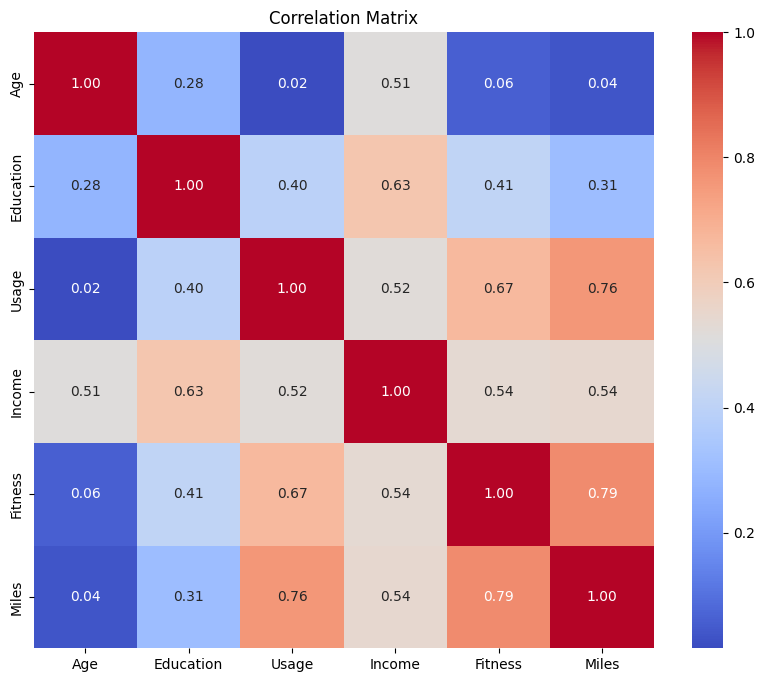

In [35]:
# Select relevant columns for correlation analysis
selected_columns = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Calculate correlation matrix
correlation_matrix = customers[selected_columns].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

#6. Customer profiling and recommendation

In [36]:
# Make customer profilings for each and every product.
# Hint: We want you to find at What age, gender, and income group but product the KP281

In [67]:
# Filter data for KP281 product
kp281_df = customers[customers['Product'] == 'KP281']

# Calculate age, gender, and income group profile
age_profile = (kp281_df['Age'].min(), kp281_df['Age'].max())
gender_profile = kp281_df['Gender'].value_counts(normalize=True) * 100
income_group_profile = (kp281_df['Income'].min(), kp281_df['Income'].max())

# Display profiles
print("Customer Profiling for KP281:")
print("Age Range:", age_profile)
print("Gender Distribution:\n", gender_profile)
print("Income Group:", income_group_profile)

Customer Profiling for KP281:
Age Range: (18, 50)
Gender Distribution:
 Male      50.0
Female    50.0
Name: Gender, dtype: float64
Income Group: (29562, 68220)


In [65]:
# Filter data for each product
kp281_df = customers[customers['Product'] == 'KP281']
kp481_df = customers[customers['Product'] == 'KP481']
kp781_df = customers[customers['Product'] == 'KP781']

# Calculate age, gender, and income group profile for KP281
kp281_age_profile = (kp281_df['Age'].min(), kp281_df['Age'].max())
kp281_gender_profile = kp281_df['Gender'].value_counts(normalize=True) * 100
kp281_income_group_profile = (kp281_df['Income'].min(), kp281_df['Income'].max())

# Calculate age, gender, and income group profile for KP481
kp481_age_profile = (kp481_df['Age'].min(), kp481_df['Age'].max())
kp481_gender_profile = kp481_df['Gender'].value_counts(normalize=True) * 100
kp481_income_group_profile = (kp481_df['Income'].min(), kp481_df['Income'].max())

# Calculate age, gender, and income group profile for KP781
kp781_age_profile = (kp781_df['Age'].min(), kp781_df['Age'].max())
kp781_gender_profile = kp781_df['Gender'].value_counts(normalize=True) * 100
kp781_income_group_profile = (kp781_df['Income'].min(), kp781_df['Income'].max())

# Create dataframes for age profile
age_profile_df = pd.DataFrame({
    'Product': ['KP281', 'KP481', 'KP781'],
    'Min Age': [kp281_age_profile[0], kp481_age_profile[0], kp781_age_profile[0]],
    'Max Age': [kp281_age_profile[1], kp481_age_profile[1], kp781_age_profile[1]]
})

# Create dataframes for gender profile
gender_profile_df = pd.DataFrame({
    'Product': ['KP281', 'KP481', 'KP781'],
    'Male (%)': [kp281_gender_profile.get('Male', 0), kp481_gender_profile.get('Male', 0), kp781_gender_profile.get('Male', 0)],
    'Female (%)': [kp281_gender_profile.get('Female', 0), kp481_gender_profile.get('Female', 0), kp781_gender_profile.get('Female', 0)]
})

# Create dataframes for income profile
income_profile_df = pd.DataFrame({
    'Product': ['KP281', 'KP481', 'KP781'],
    'Min Income': [kp281_income_group_profile[0], kp481_income_group_profile[0], kp781_income_group_profile[0]],
    'Max Income': [kp281_income_group_profile[1], kp481_income_group_profile[1], kp781_income_group_profile[1]]
})

# Merge all profiles into one dataframe
all_profiles_df = pd.merge(age_profile_df, gender_profile_df, on='Product')
all_profiles_df = pd.merge(all_profiles_df, income_profile_df, on='Product')

# Display all profiles
print(all_profiles_df)


  Product  Min Age  Max Age   Male (%)  Female (%)  Min Income  Max Income
0   KP281       18       50  50.000000   50.000000       29562       68220
1   KP481       19       48  51.666667   48.333333       31836       67083
2   KP781       22       48  82.500000   17.500000       48556      104581


# Actionable items for business

In [59]:
# Focus marketing efforts towards younger people (aged 25-30) for promoting the KP781 treadmill, highlighting its advanced features and benefits.

# Implement strategies to reach out to higher income people (Income >= 60000) with messaging that resonates with their lifestyle and
# emphasizes the value of the KP781 treadmill.

# Highlight the durability and performance of the KP781 treadmill for customers who expect to cover longer distances (more than 120 miles per week),
# emphasizing its suitability for their exercise needs.

# Tailor marketing messages to emphasize how the advanced features of the KP781 treadmill can support customers in achieving their fitness goals,
# particularly those who rate their fitness level as above average (fitness >= 3).

# Create educational materials highlighting the benefits of higher education and its correlation with advanced treadmill features,
# targeting customers with education levels greater than 16.

# Offer special promotions or discounts to customers with higher incomes (Income >= 60000) to incentivize them to purchase the KP781 treadmill,
# highlighting its value proposition.

# Segment the customer base based on age, education, usage frequency, fitness level, income, and expected mileage, allowing for targeted marketing and personalized messaging